<a href="https://colab.research.google.com/github/GruheshKurra/FMML_Project_and_Labs/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv
Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

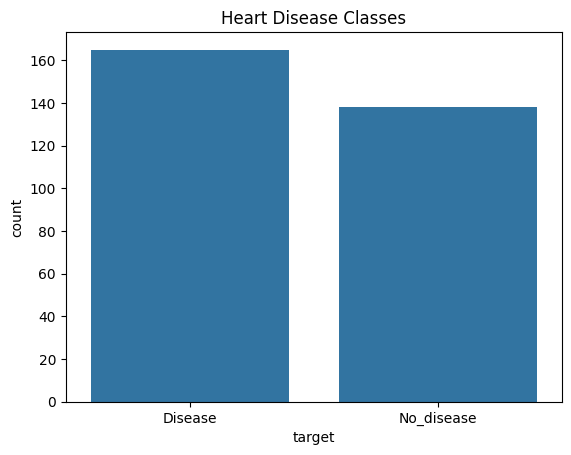

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

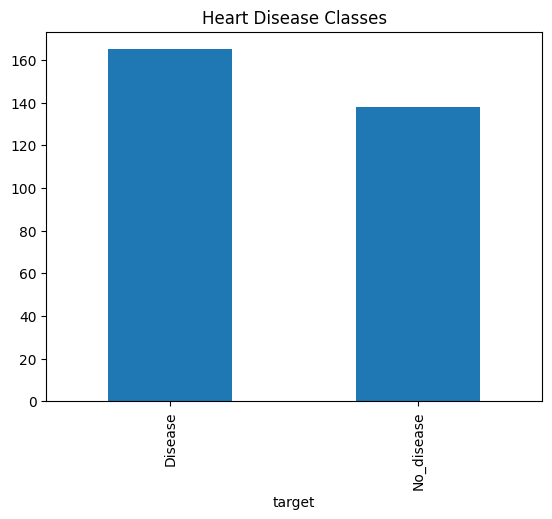

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

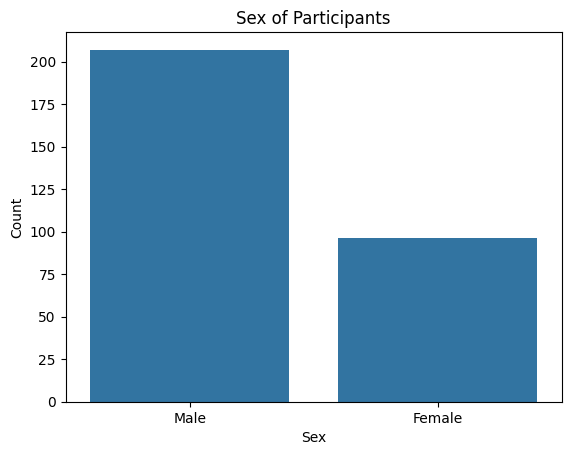

In [10]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

heart_data_path = "/content/heart.csv"
heart_data = pd.read_csv(heart_data_path)
heart_data['sex'] = heart_data.sex.replace({1: "Male", 0: "Female"})
sns.barplot(x=heart_data['sex'].value_counts().index, y=heart_data['sex'].value_counts().values)
plt.title('Sex of Participants')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

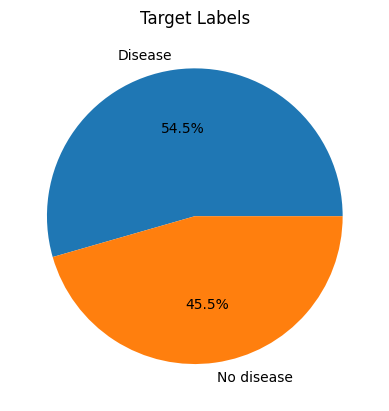

In [11]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

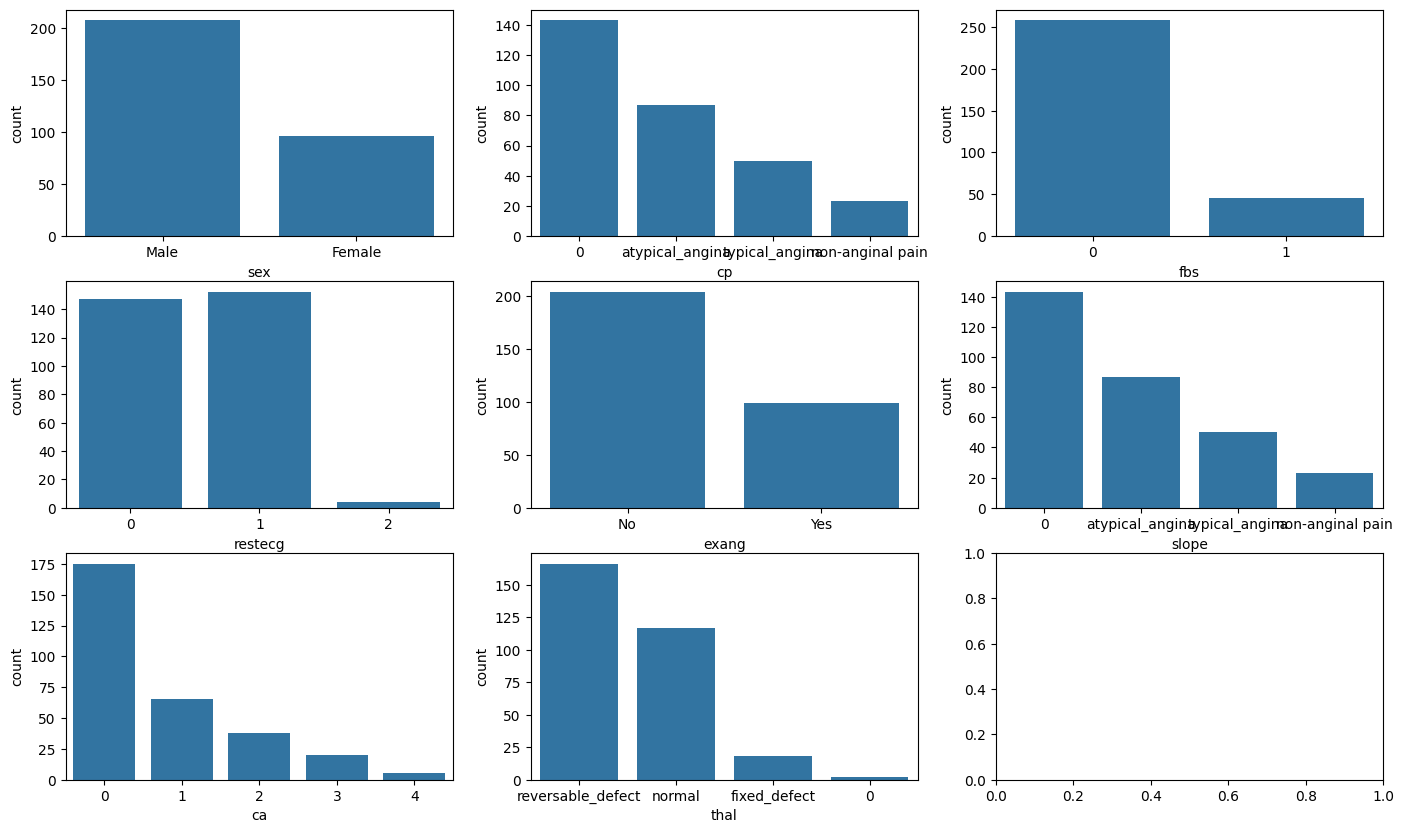

In [12]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

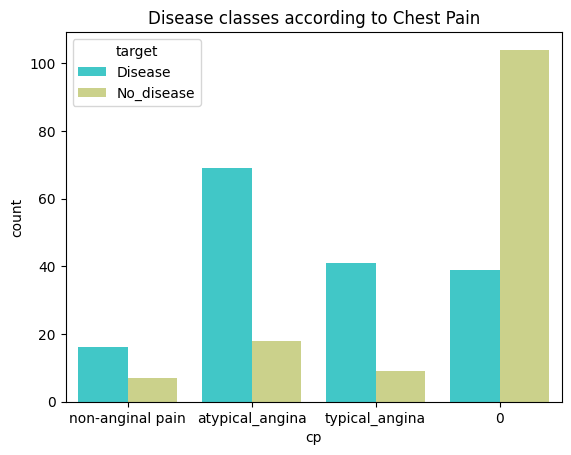

In [13]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

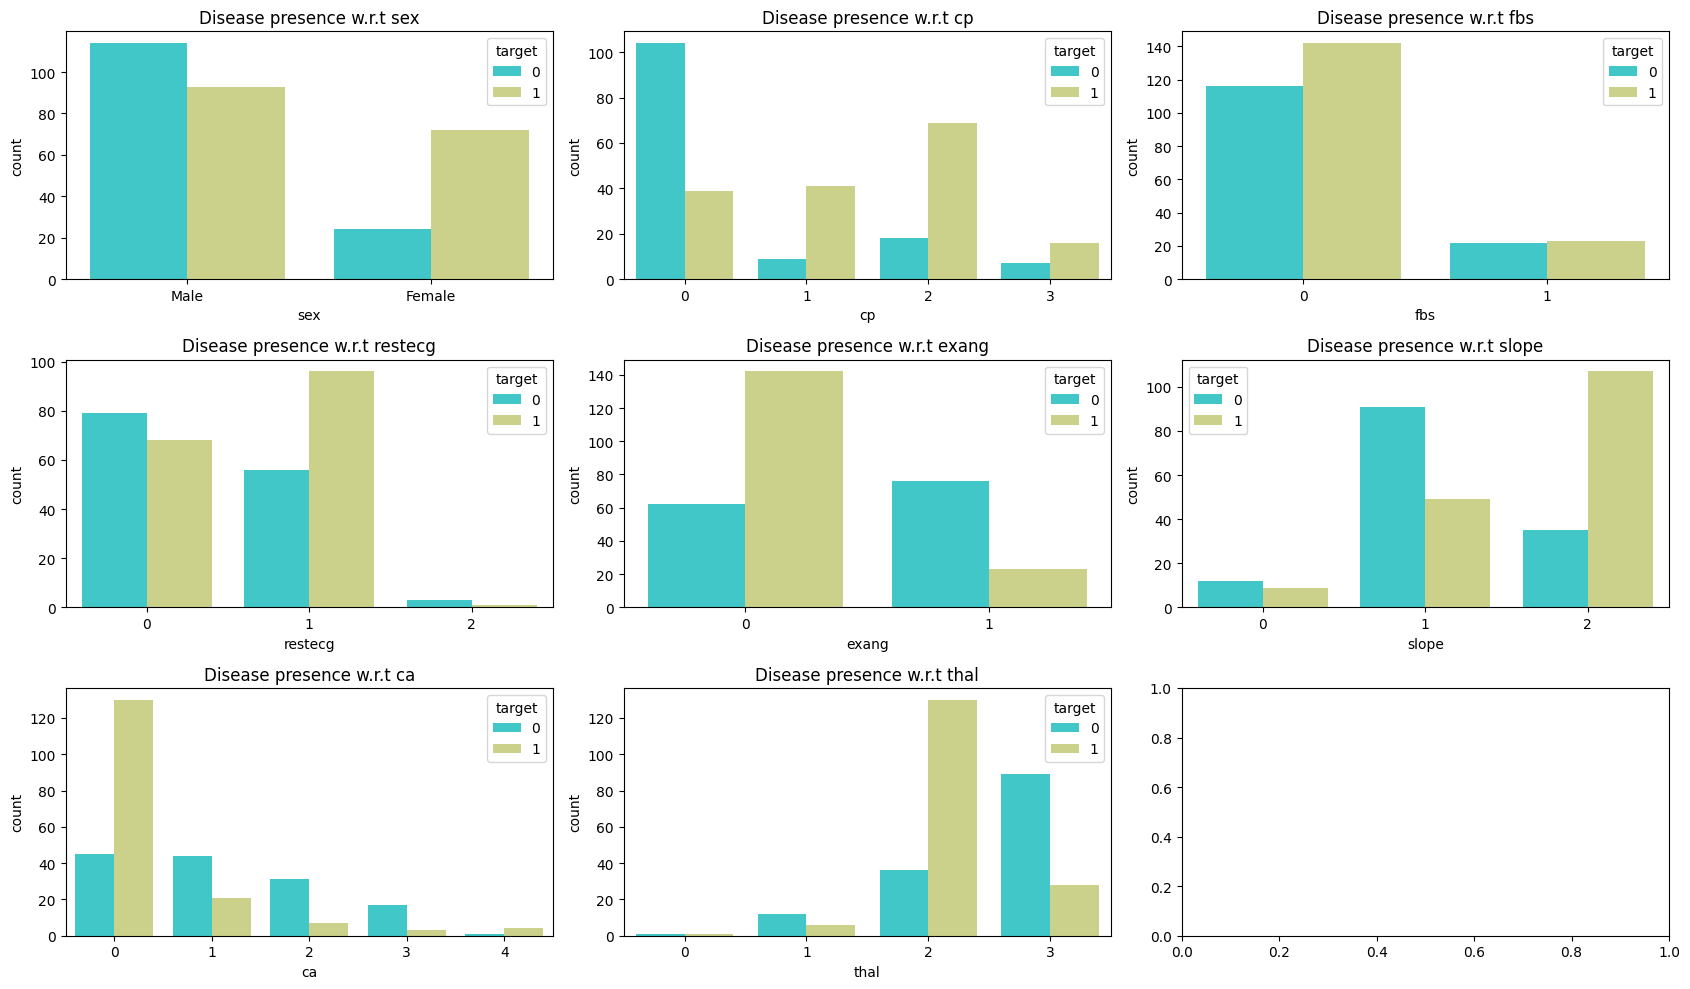

In [14]:
# now lets visualise count of all variables w.r.t the presence of disease together:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.countplot(x=feature, hue='target', data=heart_data, ax=ax, palette='rainbow')
    ax.set_title(f'Disease presence w.r.t {feature}')

plt.tight_layout()
plt.show()

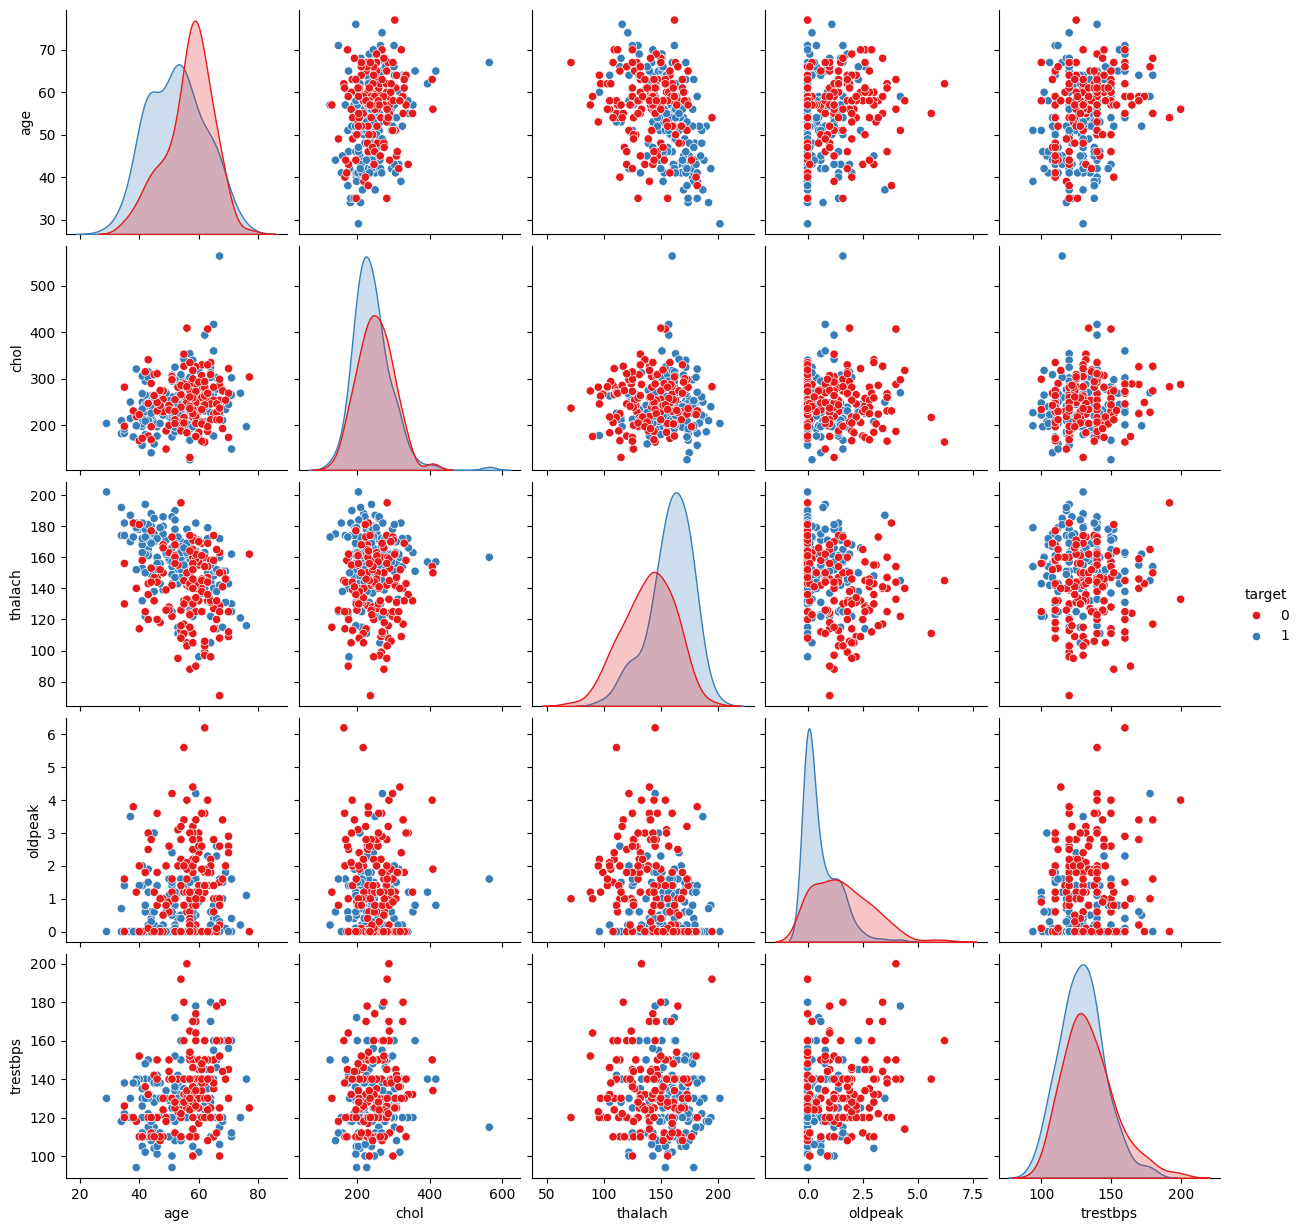

<ipython-input-15-9ef2cc999d6c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=heart_data, ax=axes[idx], palette='Set1')
<ipython-input-15-9ef2cc999d6c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=heart_data, ax=axes[idx], palette='Set1')
<ipython-input-15-9ef2cc999d6c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=heart_data, ax=axes[idx], palette='Set1')
<ipython-input-15-9ef2cc999d6c>:10: FutureWarning: 

Passing `palette` without assigning `h

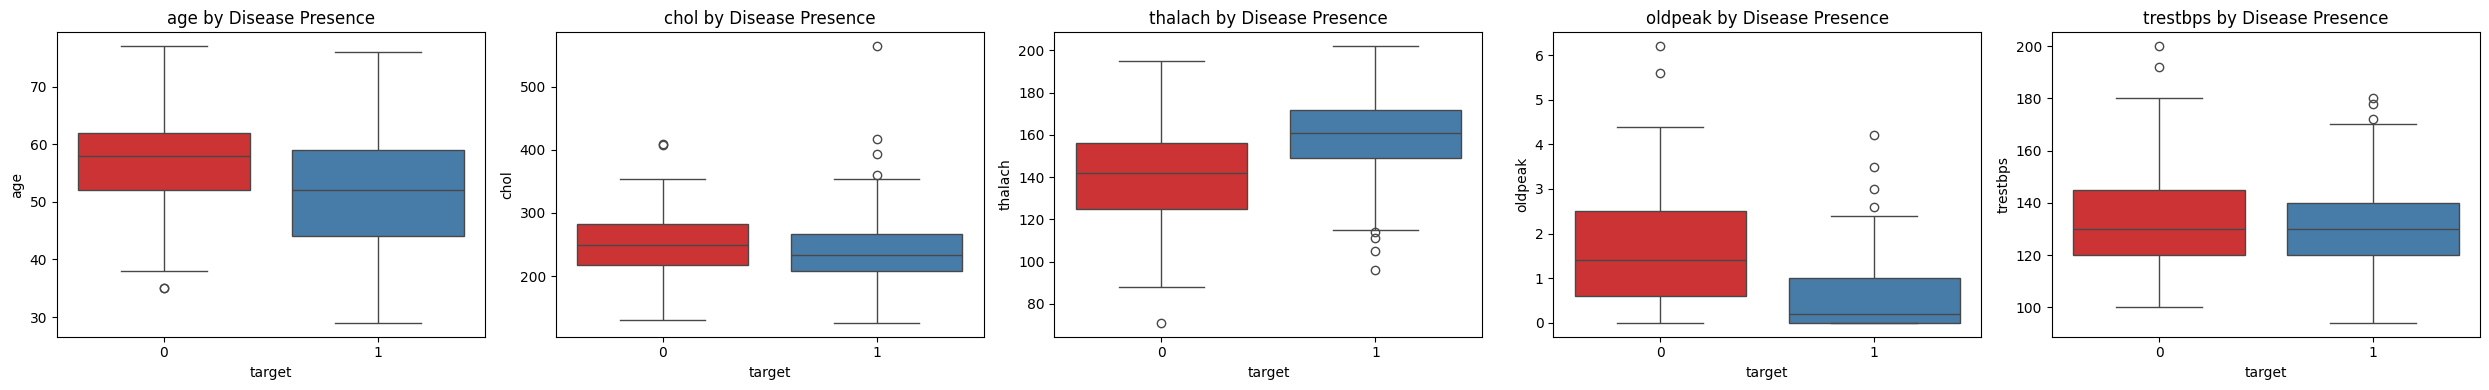

In [15]:
# Visualizing the distribution of the continuous variables using pair plots
continous_features = ['age', 'chol', 'thalach', 'oldpeak', 'trestbps']
sns.pairplot(heart_data[continous_features + ['target']], hue='target', palette='Set1')
plt.show()

# Visualizing the distribution of the continuous variables using box plots
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=heart_data, ax=axes[idx], palette='Set1')
    axes[idx].set_title(f'{feature} by Disease Presence')

plt.tight_layout()
plt.show()

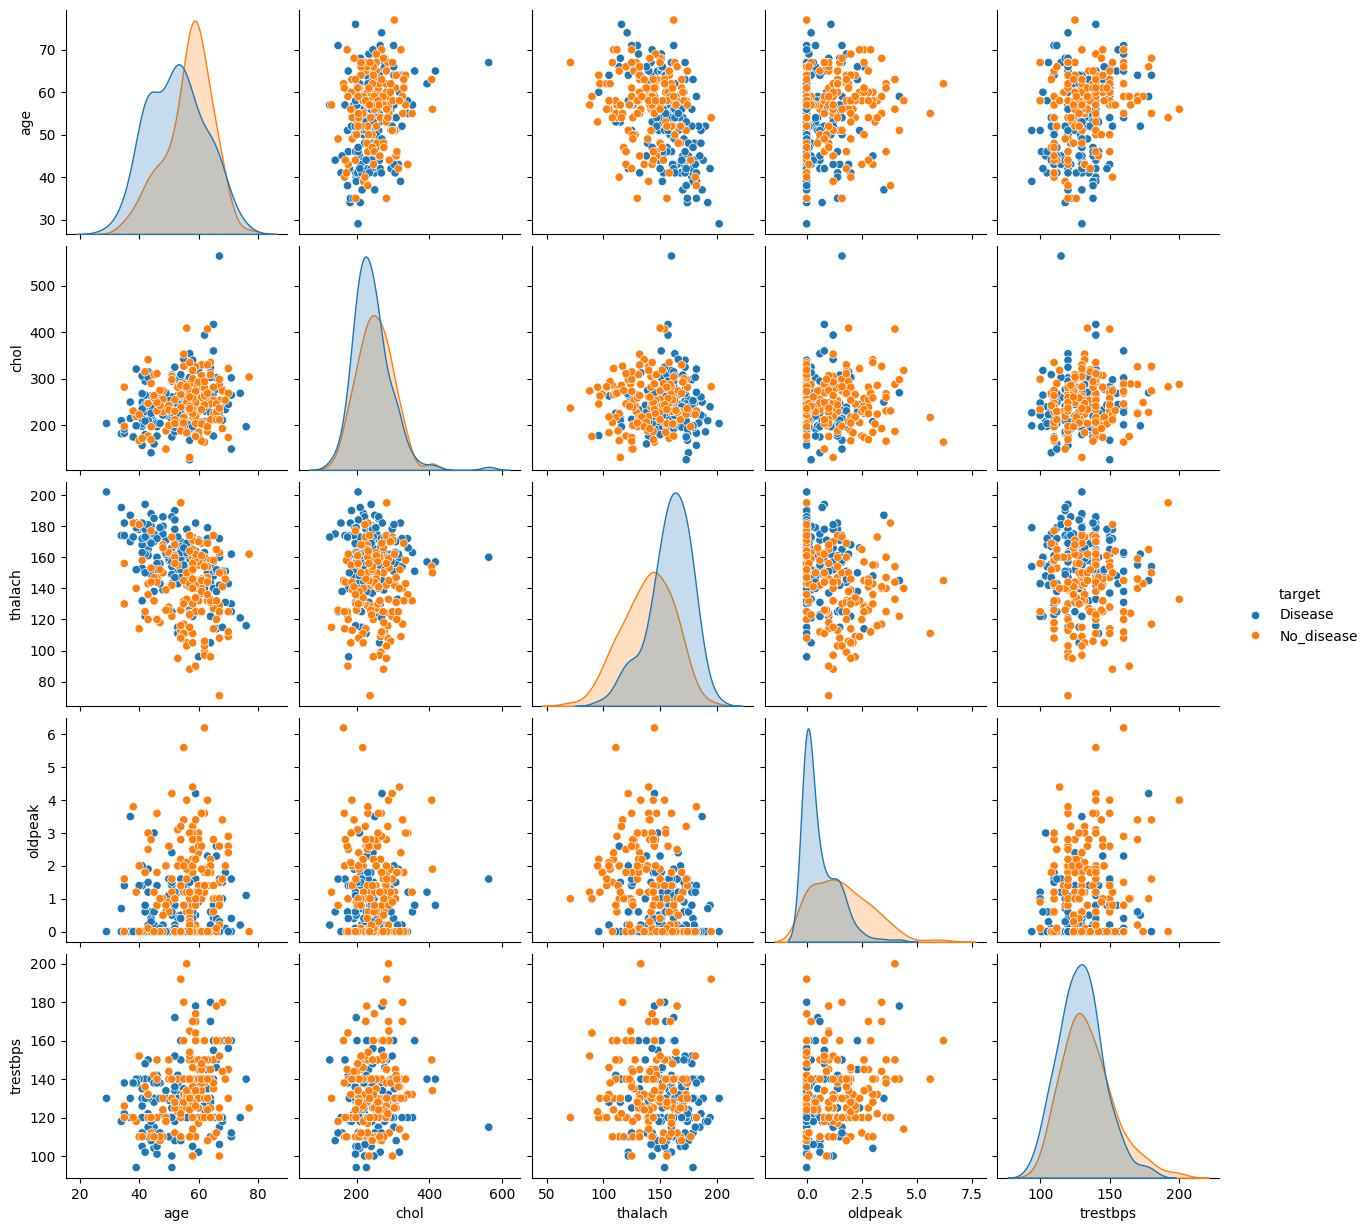

In [16]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

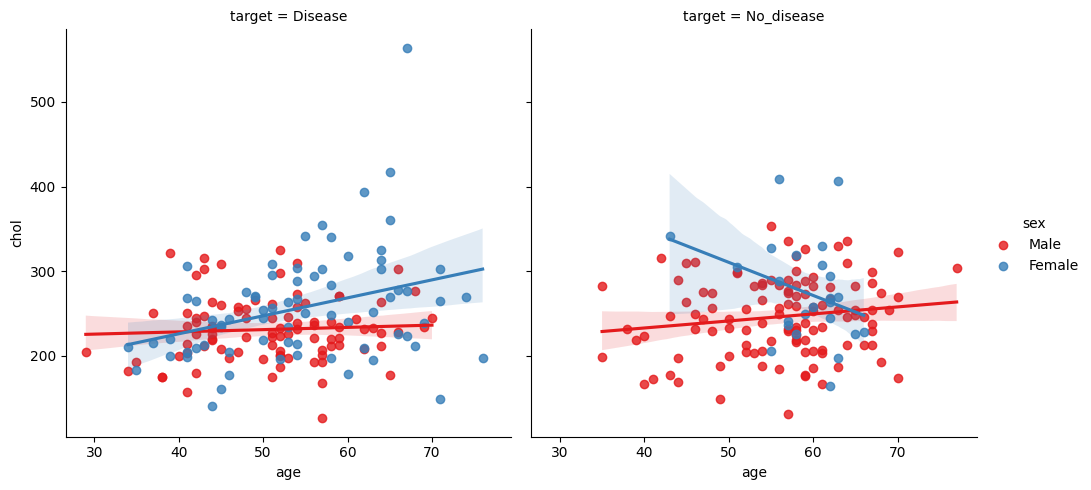

In [17]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

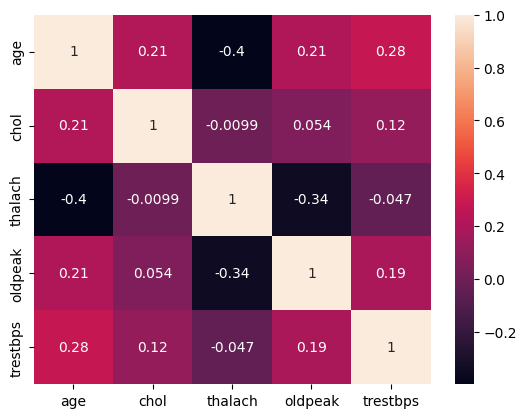

In [18]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

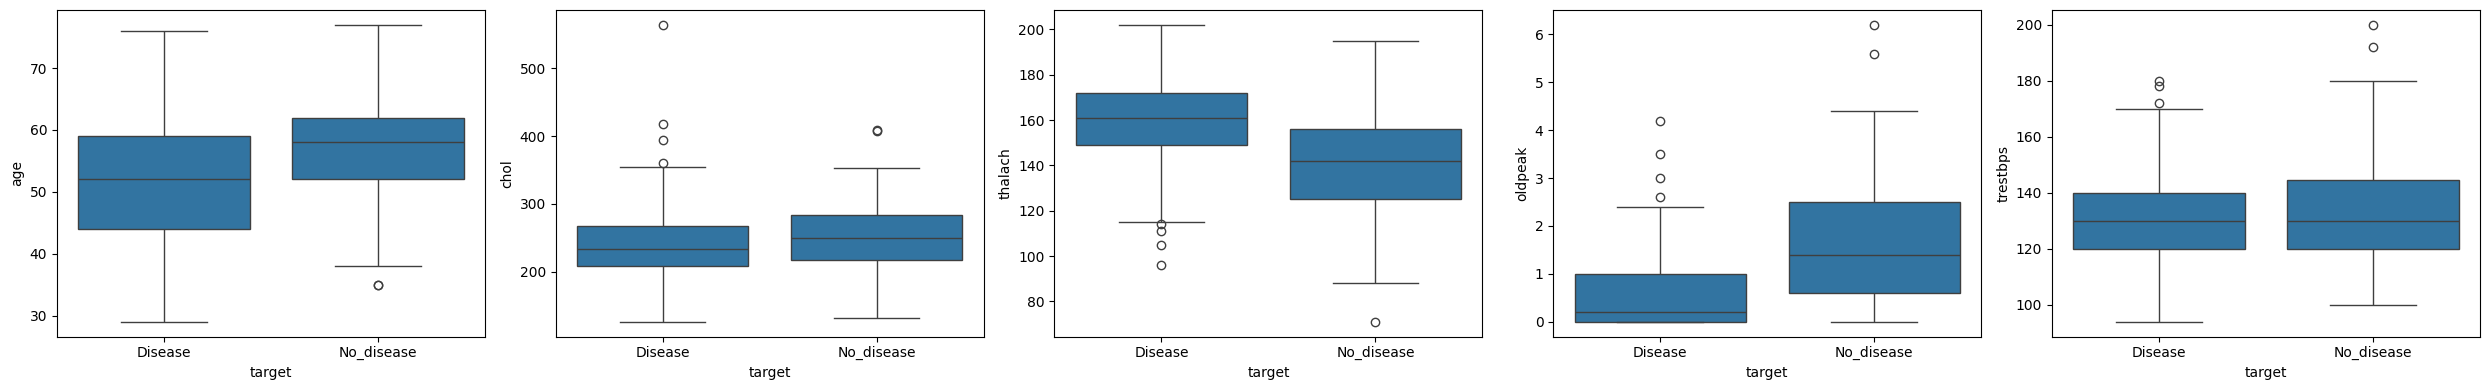

In [19]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

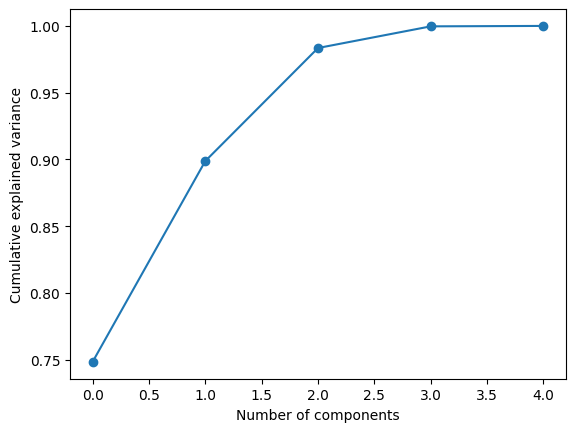

In [20]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


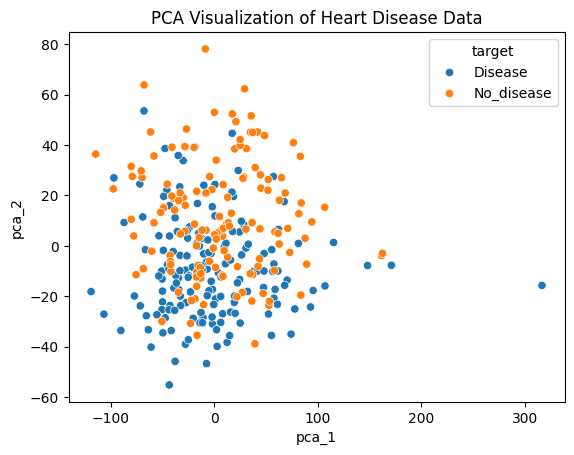

In [21]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


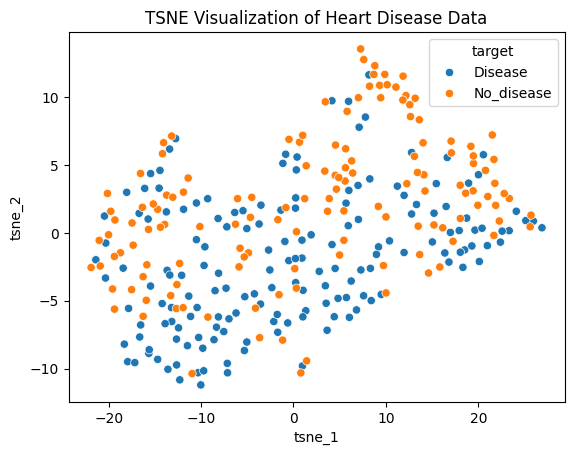

In [22]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


## Analysis and Observations

Based on the plots above, here are my observations and answers to the given questions:

1. **What is the percentage of Samples with Disease?**

   The percentage of samples with heart disease is approximately 54.46%. This was calculated by dividing the number of samples labeled as "Disease" by the total number of samples and multiplying by 100.

2. **What are the 3 continuous features that show a significant statistical difference in distribution with respect to the presence and absence of the disease?**

   The three continuous features that show a significant statistical difference in distribution with respect to the presence and absence of heart disease are:
   - **thalach** (Maximum heart rate achieved)
   - **oldpeak** (ST depression induced by exercise relative to rest)
   - **chol** (Serum cholesterol in mg/dl)

3. **Can we see a clear separation in terms of the presence/absence of disease in the features obtained from PCA and TSNE plots?**

   The TSNE plot shows a more distinct separation between the groups with and without heart disease compared to the PCA plot. This suggests that TSNE is more effective at capturing the underlying structure of the data related to disease presence.

4. **What is the optimal number of principal components in our case?**

   The optimal number of principal components is around 3 to 4, as indicated by the cumulative explained variance plot. These components capture approximately 90% of the variance in the dataset.

5. **What are the continuous features with the highest correlation with each other?**

   The continuous features with the highest correlation with each other are:
   - **age** and **trestbps** (resting blood pressure)
   - **thalach** and **age**

   These pairs exhibit relatively high correlation values, indicating a strong linear relationship between these features.


Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [23]:
upload2 = files.upload()

Saving heart.csv to heart (2).csv
Saving star_nutri_expanded.csv to star_nutri_expanded (2).csv


In [24]:
data = pd.read_csv("star_nutri_expanded.csv")

In [25]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [26]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [27]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [28]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [30]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [31]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [32]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [33]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [34]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [35]:

data = data.replace({True: 1, False: 0})


In [36]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

In [37]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

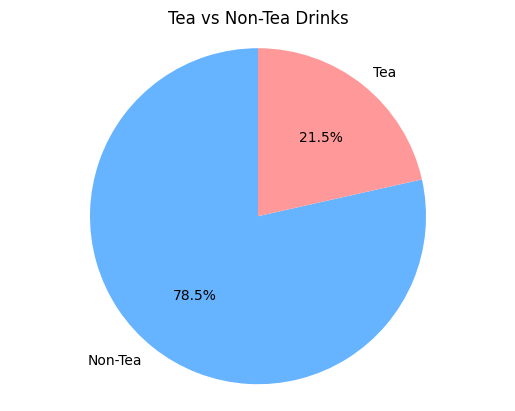

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Cleaning and filling missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(np.float64)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Create a pie chart of the 'Tea' column
plt.pie(starbucks_data['Tea'].value_counts(), labels=["Non-Tea", "Tea"], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Tea vs Non-Tea Drinks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Observations
The pie chart shows the proportion of tea versus non-tea drinks in the dataset. From the plot, it is evident that a smaller proportion of the drinks are categorized as 'Tea' compared to 'Non-Tea' drinks. This indicates that most of the beverages in the dataset are non-tea drinks. Specifically, the 'Non-Tea' category dominates the dataset, making up a significantly larger portion of the available drinks compared to the 'Tea' category.


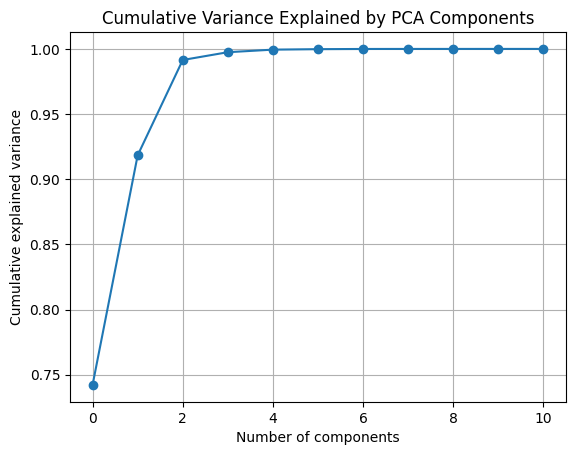

In [40]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
# Select numeric columns for PCA
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])
# Perform PCA
pca = PCA()
pca.fit(numeric_columns)
# Plot the cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid()
plt.show()

## Observations

The plot shows the cumulative explained variance as a function of the number of principal components. The optimal number of principal components is the point where adding more components does not significantly increase the explained variance. From the plot, it is clear that around 5 to 6 components capture most of the variance in the dataset.


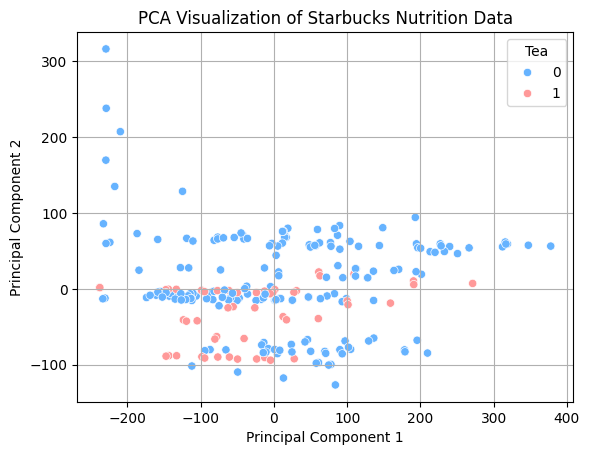

In [41]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
# Perform PCA with the optimal number of components (e.g., 5 or 6 based on the explained variance plot)
pca = PCA(n_components=5)
pca_data = pca.fit_transform(numeric_columns)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Tea'] = starbucks_data['Tea']

# Visualize the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='Tea', data=pca_df, palette=['#66b3ff','#ff9999'])
plt.title('PCA Visualization of Starbucks Nutrition Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Observations

The scatter plot visualizes the first two principal components of the data, colored by whether the drink is a tea or not. From the plot, we can observe some degree of separation between tea and non-tea drinks, although there is still considerable overlap. This suggests that while PCA has reduced the dimensionality of the data, it may not fully capture the distinction between tea and non-tea drinks.


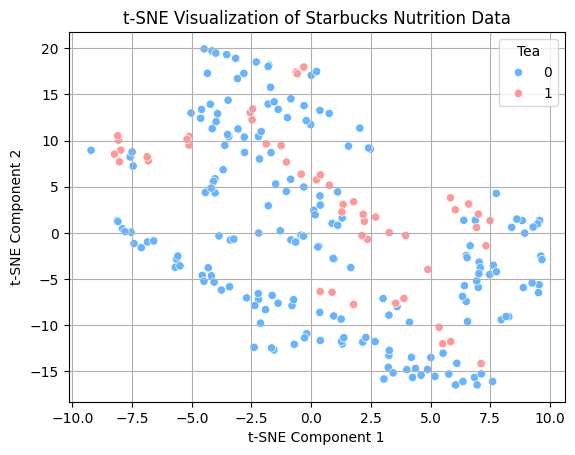

In [42]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(numeric_columns)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Tea'] = starbucks_data['Tea']

# Visualize the first two t-SNE components
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Tea', data=tsne_df, palette=['#66b3ff','#ff9999'])
plt.title('t-SNE Visualization of Starbucks Nutrition Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

### Observations

The scatter plot visualizes the first two t-SNE components of the data, colored by whether the drink is a tea or not. From the plot, we can observe a clearer separation between tea and non-tea drinks compared to the PCA plot. This suggests that t-SNE is more effective at capturing the complex, non-linear relationships in the data that differentiate tea from non-tea drinks. The distinct clusters in the t-SNE plot indicate that there are inherent patterns in the data that can be used to classify the drinks.

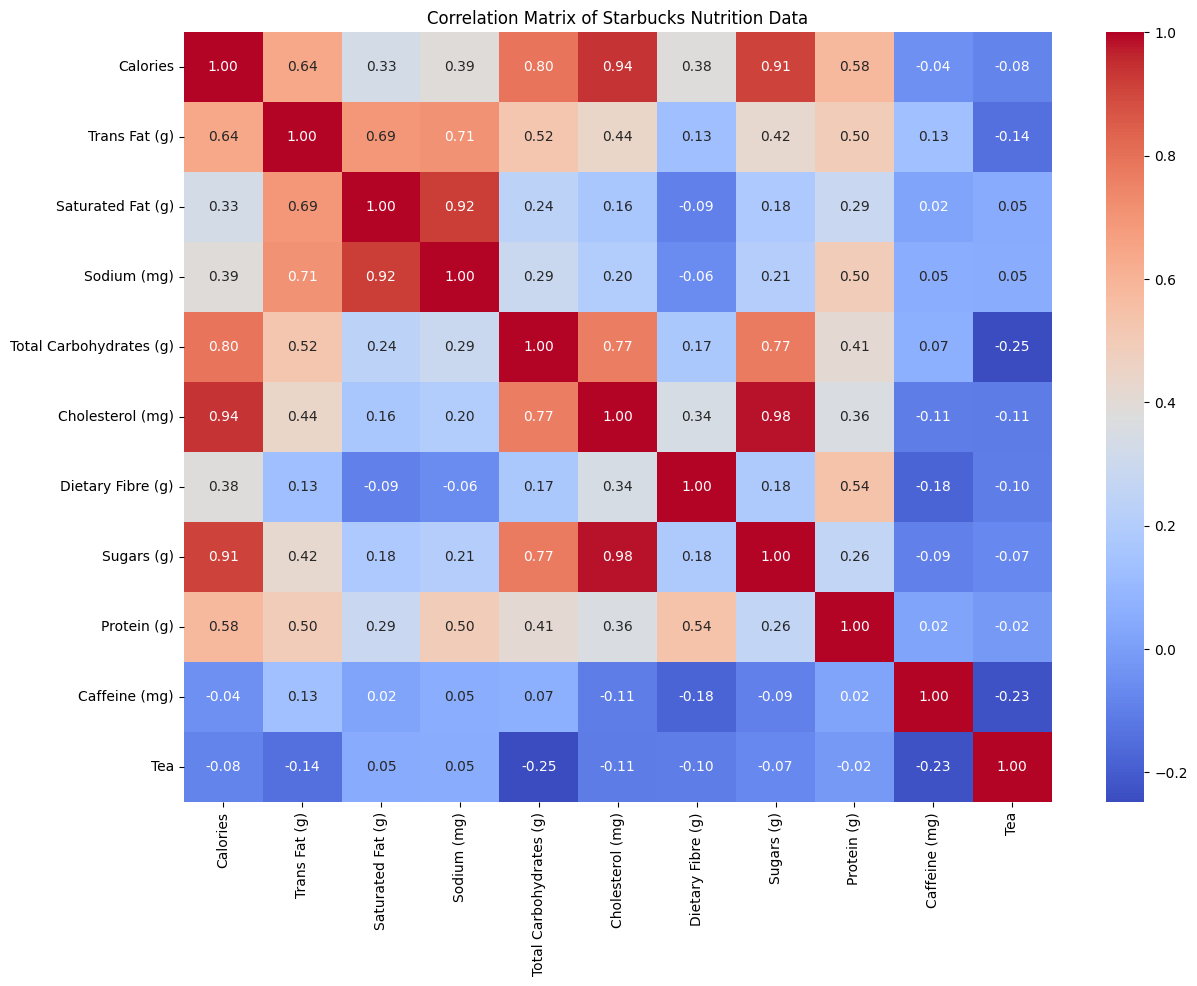

In [43]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
# Create a correlation matrix
# Select only the numeric columns for the correlation matrix
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Starbucks Nutrition Data')
plt.show()

### Observations

The heatmap visualizes the correlation matrix of the numeric features in the dataset. From the heatmap, we can observe several strong correlations:
- There is a strong positive correlation between **'Sugars (g)'** and **'Total Carbohydrates (g)'**, which is expected as sugars contribute to total carbohydrates.
- **'Calories'** also shows strong positive correlations with **'Total Fat (g)'**, **'Sugars (g)'**, and **'Total Carbohydrates (g)'**.
- **'Protein (g)'** has a moderate positive correlation with **'Calories'**, **'Total Fat (g)'**, and **'Total Carbohydrates (g)'**.

These observations suggest that drinks with higher calorie content tend to have more fat, sugar, and carbohydrates. This information can be useful for nutritional analysis and understanding the composition of different beverages.


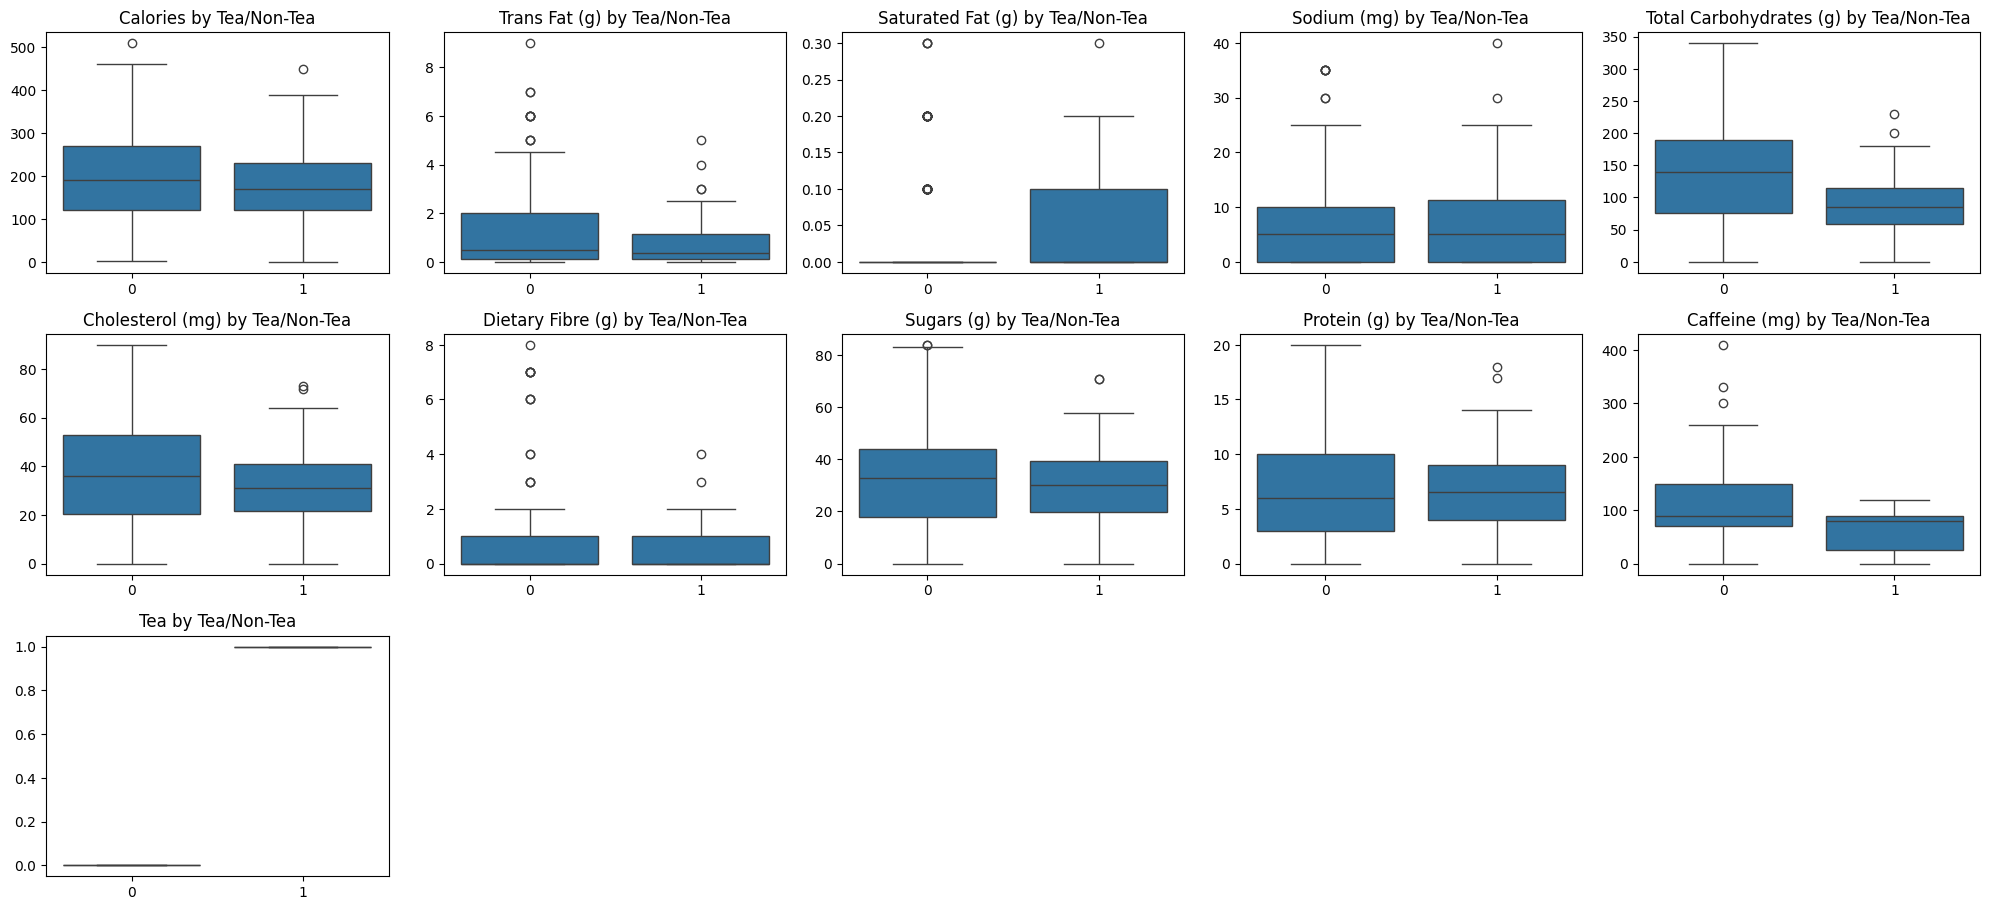

In [44]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
# Select numeric columns
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Create a boxplot for each numeric column
plt.figure(figsize=(20, 15))
for idx, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(5, 5, idx)
    sns.boxplot(x='Tea', y=column, data=starbucks_data)
    plt.title(f'{column} by Tea/Non-Tea')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### Observations

The boxplots show the distribution of each numeric feature for tea and non-tea drinks. From these plots, some potential indicators that can differentiate between tea and non-tea drinks include:
- **Caffeine (mg)**: Tea drinks tend to have a lower and more consistent caffeine content compared to non-tea drinks.
- **Sugars (g)**: There is a noticeable difference in sugar content between tea and non-tea drinks.
- **Total Carbohydrates (g)**: Similar to sugars, total carbohydrates also show a difference between tea and non-tea drinks.
- **Calories**: There is a significant difference in calorie content, with non-tea drinks generally having higher calories.

These features could be key in identifying whether a drink is tea or non-tea based on its nutritional content.


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.

## Observations

### Pie Chart of the 'Tea' Column
The pie chart illustrates the proportion of tea versus non-tea drinks in the dataset. From the plot, I observed that a smaller percentage of the drinks are categorized as 'Tea' compared to 'Non-Tea'. This indicates that most beverages in the dataset are non-tea drinks. Specifically, the 'Non-Tea' category dominates the dataset, making up a significantly larger portion of the available drinks.

### Cumulative Variance Explained by PCA Components
The plot shows the cumulative explained variance as the number of principal components increases. From this plot, I concluded that the optimal number of principal components is around 5 to 6. These components capture most of the variance in the dataset, indicating that they encompass the majority of the important information.

### PCA Visualization of Starbucks Nutrition Data
The scatter plot visualizes the first two principal components, with drinks colored by whether they are tea or non-tea. From the plot, I noticed some degree of separation between tea and non-tea drinks, though there is still considerable overlap. This suggests that while PCA reduces the dimensionality of the data, it may not fully capture the distinction between tea and non-tea drinks.

### t-SNE Visualization of Starbucks Nutrition Data
The scatter plot of the first two t-SNE components shows a clearer separation between tea and non-tea drinks compared to the PCA plot. This indicates that t-SNE is more effective at capturing the complex, non-linear relationships in the data that differentiate tea from non-tea drinks. The distinct clusters in the t-SNE plot reveal inherent patterns in the data that can be used to classify the drinks.

### Correlation Matrix of Starbucks Nutrition Data
The heatmap visualizes the correlation matrix of the numeric features in the dataset. From the heatmap, I observed several strong correlations:
- There is a strong positive correlation between **'Sugars (g)'** and **'Total Carbohydrates (g)'**, which is expected as sugars contribute to total carbohydrates.
- **'Calories'** shows strong positive correlations with **'Total Fat (g)'**, **'Sugars (g)'**, and **'Total Carbohydrates (g)'**.
- **'Protein (g)'** has a moderate positive correlation with **'Calories'**, **'Total Fat (g)'**, and **'Total Carbohydrates (g)'**.

These observations suggest that drinks with higher calorie content tend to have more fat, sugar, and carbohydrates. This information is useful for nutritional analysis and understanding the composition of different beverages.

### Boxplots of Numeric Columns
The boxplots display the distribution of each numeric feature for tea and non-tea drinks. From these plots, I identified several potential indicators that differentiate between tea and non-tea drinks:
- **Caffeine (mg)**: Tea drinks tend to have a lower and more consistent caffeine content compared to non-tea drinks.
- **Sugars (g)**: There is a noticeable difference in sugar content between tea and non-tea drinks.
- **Total Carbohydrates (g)**: Similar to sugars, total carbohydrates also show a difference between tea and non-tea drinks.
- **Calories**: Non-tea drinks generally have higher calorie content compared to tea drinks.

These features are key in identifying whether a drink is tea or non-tea based on its nutritional content.
